# Women in Data Science (WiDS Datathon) 2023 
## Adapting to Climate Change by Improving Extreme Weather Forecasts with Machine Learning

#### The most of research studies show climate change has led to future warming, and devastating weather is growing more frequent. Extreme weather events event and conditions such as heatwaves, cold spells, heavy precipitation events, and tropical and extratropical cyclones take a significant toll on worldwide human lives, public health, economic prosperity, infrastructure, and ecosystems. Therefore, it is crucial to improve our understanding of extreme weather events and to predict their impacts through accurate frameworks for predicting extreme weather events ahead of time.
#### Observing, monitoring, and predicting extreme events and managing their impacts requires an extraordinary amount of information about the state of Earth and how it changes from moment to moment and decade to decade. There are many differences between the various types of extreme weather events. Predicting them requires regional and seasonal knowledge about each component of the climate system, including ocean, atmosphere, sea ice, etc.
#### This dataset consists of enormous number of variables related to  Temperature, Precipitation, Sea surface temperature and sea ice concentration, Multivariate ENSO index (MEI), Madden-Julian oscillation (MJO),  Relative humidity, sea level pressure, and precipitable water for the entire atmosphere, Geopotential height, zonal wind, and longitudinal wind, North American Multi-Model Ensemble (NMME), Pressure and potential evaporation, Elevation, and Köppen-Geiger climate classifications. 

1. [What to forecast](#1)
2. [DataSet](#2)
3. [Load the Data](#3)
4. [View Data](#4)
5. [Handeling missing Data](#5)
6. [Analyse the Target Variable](#6)
7. [Exploratory Data Analysis](#7)
8. [Train | Validation Split](#8)
9. [Time Series Split for Cross Validation](#9)
10. [Training, Evaluating and Validation](#10)

<a id="1"></a> <br>
# 1. What to forecast/Predict

The WiDS Datathon 2023 focuses on a prediction task involving forecasting sub-seasonal temperatures (temperatures over a two-week period) within the United States. 

<a id="2"></a> <br>
# 2. DataSet

The dataset has 256 variables, including the unique index and the target variable **"contest-tmp2m-14d__tmp2m"**.
The data are from 514 locations within 15 climate zones in the United States. 
The train dataset includes daily data instances between 09/01/2014 - 08/31/2016
The dataset includes daily data instances between 11/01/2022 - 12/31/2022 and expected to predict the temperature variable contest-tmp2m-14d__tmp2m.  

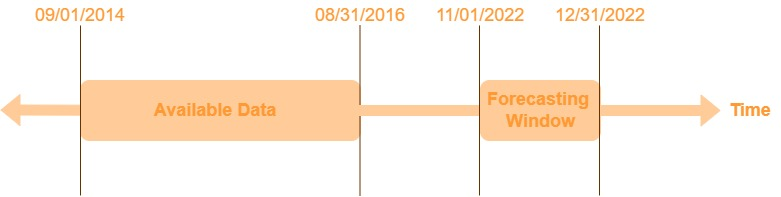/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm 
from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pip install -U feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import DropFeatures

<a id="3"></a> <br>
# 3. Load the Data

In [4]:
train_data = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv', index_col = ['startdate'])
test_data = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv', index_col = ['startdate'])
submit = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv')

<a id="4"></a> <br>
# 4. View Data

## First, have a look in to the Train dataset

In [5]:
train_data.head()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
startdate,,,,,,,,,,,,,,,,,,,,,
9/1/14,0,0.0,0.833333,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
9/2/14,1,0.0,0.833333,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
9/3/14,2,0.0,0.833333,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
9/4/14,3,0.0,0.833333,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
9/5/14,4,0.0,0.833333,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [6]:
test_data.head()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
startdate,,,,,,,,,,,,,,,,,,,,,
11/1/22,375734,0.0,0.833333,339.88,30.88,30.92,29.17,31.02,29.47,30.93,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
11/2/22,375735,0.0,0.833333,334.63,30.88,30.92,29.17,31.02,29.47,30.93,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
11/3/22,375736,0.0,0.833333,337.83,30.88,30.92,29.17,31.02,29.47,30.93,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
11/4/22,375737,0.0,0.833333,345.81,30.88,30.92,29.17,31.02,29.47,30.93,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
11/5/22,375738,0.0,0.833333,357.39,30.88,30.92,29.17,31.02,29.47,30.93,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [7]:
# Check the data types and data info
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 375734 entries, 9/1/14 to 8/31/16
Data columns (total 245 columns):
 #    Column                                    Non-Null Count   Dtype  
---   ------                                    --------------   -----  
 0    index                                     375734 non-null  int64  
 1    lat                                       375734 non-null  float64
 2    lon                                       375734 non-null  float64
 3    contest-pevpr-sfc-gauss-14d__pevpr        375734 non-null  float64
 4    nmme0-tmp2m-34w__cancm30                  375734 non-null  float64
 5    nmme0-tmp2m-34w__cancm40                  375734 non-null  float64
 6    nmme0-tmp2m-34w__ccsm30                   359800 non-null  float64
 7    nmme0-tmp2m-34w__ccsm40                   375734 non-null  float64
 8    nmme0-tmp2m-34w__cfsv20                   375734 non-null  float64
 9    nmme0-tmp2m-34w__gfdlflora0               375734 non-null  float64
 10   nmme0

**Most of the variables are numerical. Right now, only one variable is categorical. It is 244 features and the target variable "contest-tmp2m-14d__tmp2m". That's a lot**

In [8]:
test_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 31354 entries, 11/1/22 to 12/31/22
Data columns (total 244 columns):
 #    Column                                    Non-Null Count  Dtype  
---   ------                                    --------------  -----  
 0    index                                     31354 non-null  int64  
 1    lat                                       31354 non-null  float64
 2    lon                                       31354 non-null  float64
 3    contest-pevpr-sfc-gauss-14d__pevpr        31354 non-null  float64
 4    nmme0-tmp2m-34w__cancm30                  31354 non-null  float64
 5    nmme0-tmp2m-34w__cancm40                  31354 non-null  float64
 6    nmme0-tmp2m-34w__ccsm30                   31354 non-null  float64
 7    nmme0-tmp2m-34w__ccsm40                   31354 non-null  float64
 8    nmme0-tmp2m-34w__cfsv20                   31354 non-null  float64
 9    nmme0-tmp2m-34w__gfdlflora0               31354 non-null  float64
 10   nmme0-tmp2m-34w_

In [9]:
train_data.shape, test_data.shape

((375734, 245), (31354, 244))

**Test data does not include data for the target variable 'contest-tmp2m-14d__tmp2m'. All the other variables which are in the train data set are in the test data**

In [10]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,375734.0,187866.500000,108465.207359,0.00,93933.250000,187866.500000,281799.750000,375733.00
lat,375734.0,0.592766,0.251744,0.00,0.409091,0.590909,0.818182,1.00
lon,375734.0,0.517964,0.272059,0.00,0.300000,0.533333,0.766667,1.00
contest-pevpr-sfc-gauss-14d__pevpr,375734.0,276.744064,198.085182,-2.31,104.062500,250.320000,420.010000,1185.14
nmme0-tmp2m-34w__cancm30,375734.0,10.801682,10.952417,-14.96,1.550000,9.950000,20.230000,36.08
...,...,...,...,...,...,...,...,...
wind-vwnd-925-2010-16,375734.0,-9.846867,34.164678,-106.08,-32.170000,-8.560000,10.500000,83.89
wind-vwnd-925-2010-17,375734.0,-6.231860,27.050356,-93.98,-20.170000,-6.030000,11.630000,64.85
wind-vwnd-925-2010-18,375734.0,16.014364,25.847455,-52.61,-0.360000,18.650000,31.210000,90.39
wind-vwnd-925-2010-19,375734.0,10.489945,25.070435,-66.11,-6.790000,11.860000,29.040000,76.89


In [11]:
# cast train dataset startdate variable into date format
train_data.index = pd.to_datetime(train_data.index)
train_data.index

DatetimeIndex(['2014-09-01', '2014-09-02', '2014-09-03', '2014-09-04',
               '2014-09-05', '2014-09-06', '2014-09-07', '2014-09-08',
               '2014-09-09', '2014-09-10',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name='startdate', length=375734, freq=None)

In [12]:
train_data.index.min(), train_data.index.max()

(Timestamp('2014-09-01 00:00:00'), Timestamp('2016-08-31 00:00:00'))

**Simply it is continuous daily data for 245 variables. First thought, this is a complex dataset. Maximum Timestamp is ('2014-09-01 00:00:00'), and the minimum Timestamp is ('2016-08-31 00:00:00')). It should be 731
Data instances. But we have 375734 data instances. It seems the dataset stacked several datasets on each other. Let's check...**

In [13]:
# cast test dataset startdate variable into date format
test_data.index = pd.to_datetime(test_data.index)
test_data.index

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='startdate', length=31354, freq=None)

In [14]:
test_data.index.min(), test_data.index.max()

(Timestamp('2022-11-01 00:00:00'), Timestamp('2022-12-31 00:00:00'))

**We have test data for 61 days time period. But in total we have 31354 data instances**

## Simplify the dataset complexity by using the "lon" and "lat" variables

In [15]:
# Create a new variable called 'location' by using 'lon' & 'lat'
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

train_data['trunc_lon'] = train_data['lon'].apply(lambda x: truncate(x,4))
train_data['trunc_lon'] = train_data['trunc_lon'].map('{:.9f}'.format)

train_data['trunc_lat'] = train_data['lat'].apply(lambda x: truncate(x,4))
train_data['trunc_lat'] = train_data['trunc_lat'].map('{:.9f}'.format)

In [16]:
cols = ['trunc_lon', 'trunc_lat']
train_data['location'] = train_data[cols].apply(lambda row: '_'.join(row.values.astype(object)), axis=1)

In [17]:
train_data['location'].describe()

count                      375734
unique                        514
top       0.833300000_0.000000000
freq                          731
Name: location, dtype: object

**Problem solved! The dataset belongs to 514 unique locations. 514 * 731 daily data instances. That is how it made for 375734 data instances**

### Do the same thing for the test dataset

In [18]:
test_data['trunc_lon'] = test_data['lon'].apply(lambda x: truncate(x,4))
test_data['trunc_lon'] = test_data['trunc_lon'].map('{:.9f}'.format)

test_data['trunc_lat'] = test_data['lat'].apply(lambda x: truncate(x,4))
test_data['trunc_lat'] = test_data['trunc_lat'].map('{:.9f}'.format)

In [19]:
test_data['location'] = test_data[cols].apply(lambda row: '_'.join(row.values.astype(object)), axis=1)

In [20]:
test_data['location'].describe()

count                       31354
unique                        514
top       0.833300000_0.000000000
freq                           61
Name: location, dtype: object

**The dataset belongs to 514 unique locations. 514 * 61 daily data instances. That is how it made for 31354 data instances. But there is a problem again, are they belong to the same locations as in the train dataset or different?**

In [21]:
# Drop unnecessary columns from the train data frame  
train_data.drop(['index','lon','lat','trunc_lon','trunc_lat'], axis=1, inplace=True)

In [22]:
train_data.head()

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location
startdate,,,,,,,,,,,,,,,,,,,,,
2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,0.833300000_0.000000000
2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,0.833300000_0.000000000
2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,0.833300000_0.000000000
2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,0.833300000_0.000000000
2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,0.833300000_0.000000000


In [23]:
# Drop unnecessary columns from the test data frame  
test_data.drop(['index','lon','lat','trunc_lon','trunc_lat'], axis=1, inplace=True)

In [24]:
test_data.head()

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location
startdate,,,,,,,,,,,,,,,,,,,,,
2022-11-01,339.88,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27,0.833300000_0.000000000
2022-11-02,334.63,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16,0.833300000_0.000000000
2022-11-03,337.83,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42,0.833300000_0.000000000
2022-11-04,345.81,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69,0.833300000_0.000000000
2022-11-05,357.39,30.88,30.92,29.17,31.02,29.47,30.93,30.54,31.01,29.39,...,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64,0.833300000_0.000000000


<a id="5"></a> <br>
# 5. Handeling missing Data 

### Check for missing data in Train Dataset

In [25]:
#quick check for missing data
#null_counts=train_cleaned.isnull().sum()
#data_null = null_counts[null_counts > 0]

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(train_data)

Your selected dataframe has 243 columns and 375734 Rows.
There are 8 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
nmme0-tmp2m-34w__ccsm30,119,15934,4.2,16053,4.3,float64
nmme0-prate-56w__ccsm30,826,15934,4.2,16760,4.5,float64
nmme0-prate-34w__ccsm30,878,15934,4.2,16812,4.5,float64
ccsm30,119,15934,4.2,16053,4.3,float64
nmme-tmp2m-56w__ccsm3,115,10280,2.7,10395,2.8,float64
nmme-prate-56w__ccsm3,82,10280,2.7,10362,2.8,float64
nmme-prate-34w__ccsm3,111,8738,2.3,8849,2.4,float64
nmme-tmp2m-34w__ccsm3,112,8738,2.3,8850,2.4,float64


<AxesSubplot:>

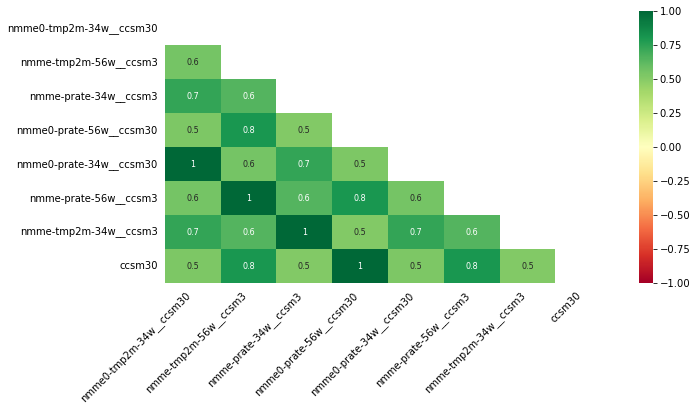

In [26]:
# Trying to identify the correlation between the features which have missing values
msno.heatmap(train_data, cmap="RdYlGn", figsize=(10,5), fontsize=10)

**There are 8 columns that have missing values.
Looks like they have good correlation between each other**

**Just look for their distribution**

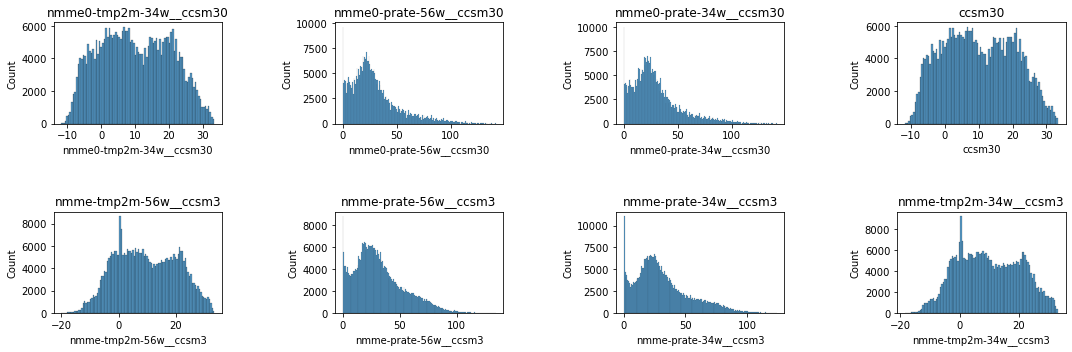

In [27]:
# Thinking about the zero values possible for these variables.
fig, axes = plt.subplots(2,4, figsize=(15, 5))
ax = axes.flatten()
zero_list = ['nmme0-tmp2m-34w__ccsm30','nmme0-prate-56w__ccsm30', 'nmme0-prate-34w__ccsm30', 'ccsm30',
             'nmme-tmp2m-56w__ccsm3','nmme-prate-56w__ccsm3', 'nmme-prate-34w__ccsm3', 'nmme-tmp2m-34w__ccsm3']
for i, col in enumerate(zero_list):
    sns.histplot(train_data[col], ax=ax[i]) 
    ax[i].set_title(col)

    ax[i].ticklabel_format(style='plain', axis='both')

fig.tight_layout(w_pad=6, h_pad=4) 
plt.show()

**The variables are precipitation, and temperature related. With my knowledge, it is possible to have zero values for them. So I decided to leave them as it is**

**I decided to fill in Null values at this stage. But it might cause data leakage problems**

**I used the dataframe method fillna for filling missing values,which will propagate last valid observation forward to next valid.
Since the missing value percentage is comparatively small, I hope this will not be a big deal for this dataset**  

In [28]:
# train_cleaned.interpolate(method ='linear', limit_direction ='forward') 
train_data.fillna(method = 'ffill' , inplace = True)

### Check for missing data in Test Dataset

In [29]:
# quick check for missing data in test dataset
null_counts=test_data.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

**Glad! No any missing data in test dataset**

<a id="6"></a> <br>
# 6. Analyse the Target Variable 'contest-tmp2m-14d__tmp2m'

In [30]:
train_data['contest-tmp2m-14d__tmp2m'].describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

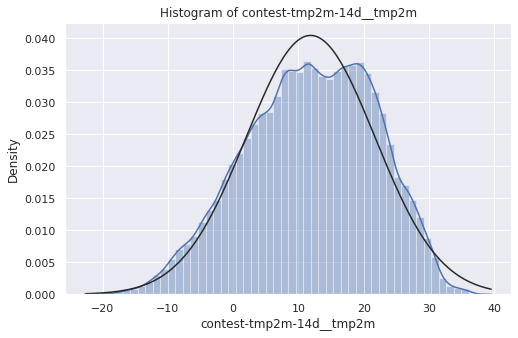

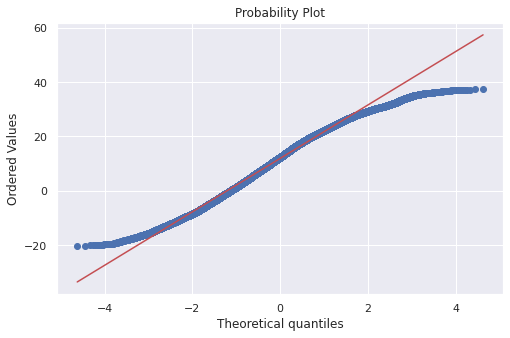

Skewness: -0.227591
Kurtosis: -0.517192


In [31]:
# Distribution plot
plt.figure(figsize=(8,5))
sns.set() # for style
sns.distplot(train_data['contest-tmp2m-14d__tmp2m'] , fit=norm)
plt.title("Histogram of contest-tmp2m-14d__tmp2m") # for histogram title
# probability plot
plt.figure(figsize=(8,5))
res = stats.probplot(train_data['contest-tmp2m-14d__tmp2m'], plot=plt)
plt.show()

# skewness and kurtosis
print("Skewness: %f" % train_data['contest-tmp2m-14d__tmp2m'].skew())
print("Kurtosis: %f" % train_data['contest-tmp2m-14d__tmp2m'].kurt())

The skewness of 'contest-tmp2m-14d__tmp2m' was found to be -0.227, indicating that the distribution was little left-skewed.

The kurtosis of 'contest-tmp2m-14d__tmp2m' was found to be -0.517, indicating that the distribution lighter-tailed compared to the normal distribution. 

**Do we need to take any actions ? As I think we don't need...**

<a id="7"></a> <br>
# 7. Exploratory Data Analysis

## Visualize Time-series Data

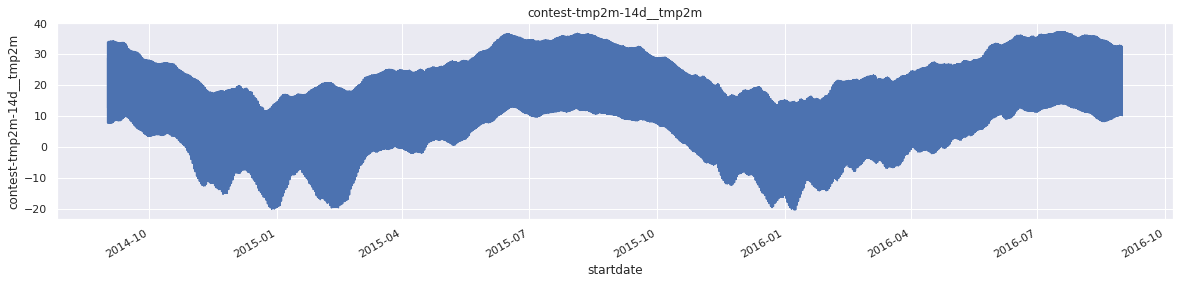

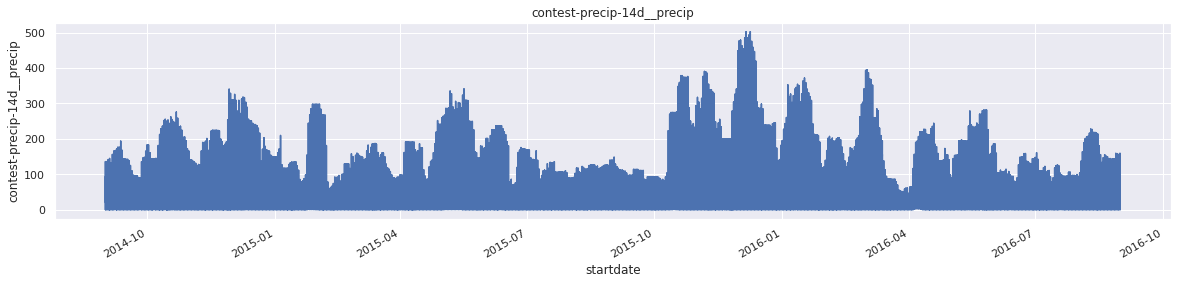

In [32]:
# Visualize time-series data Temperature and Precipitation
variables = list(train_data.columns)
for var in ['contest-tmp2m-14d__tmp2m', 'contest-precip-14d__precip']: 
    #plot the time series
    train_data[var].plot(figsize=(20,4))
    
    # add title
    plt.title(var)
    
    #the y axis lable
    plt.ylabel(var)
    
    plt.show()

## Seasonality - Temperature

In [33]:
# Capture "date" in a new variable
time_m = train_data.index.month
time_m =pd.Series(time_m, index=train_data.index)
time_y = train_data.index.year
time_y =pd.Series(time_y, index=train_data.index)

Text(0, 0.5, 'Temperature')

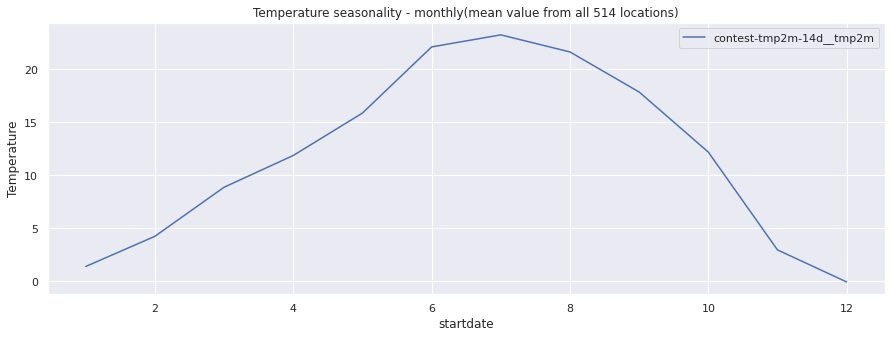

In [34]:
train_data.groupby(time_m)[['contest-tmp2m-14d__tmp2m']].mean().plot(figsize =(15,5))
plt.title("Temperature seasonality - monthly(mean value from all 514 locations)")
plt.ylabel("Temperature")

Text(0, 0.5, 'Temperature')

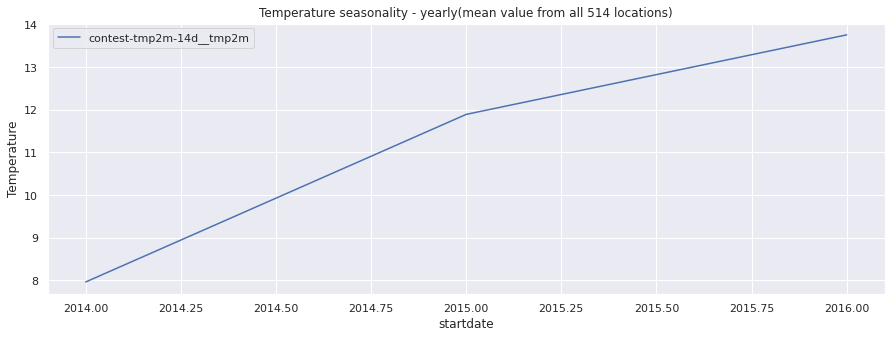

In [35]:
train_data.groupby(time_y)[['contest-tmp2m-14d__tmp2m']].mean().plot(figsize =(15,5))
plt.title("Temperature seasonality - yearly(mean value from all 514 locations)")
plt.ylabel("Temperature")

The mean temperature values are increasing between 2014 and 2015. It is nearly **6 degrees within 2 years!** 

## Seasonality - Precipitation

Text(0, 0.5, 'Precipitation')

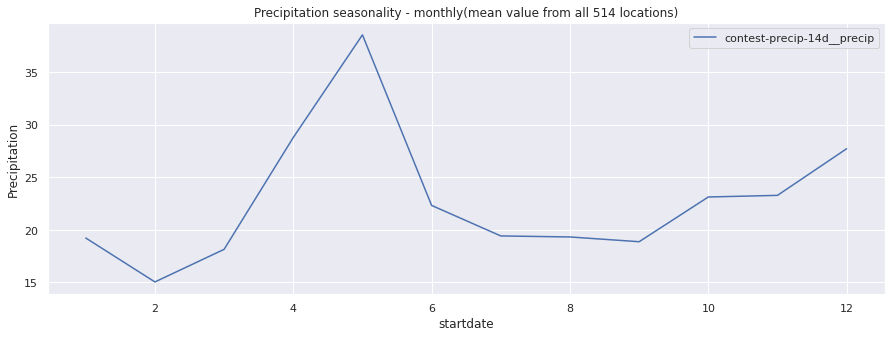

In [36]:
train_data.groupby(time_m)[['contest-precip-14d__precip']].mean().plot(figsize =(15,5))
plt.title("Precipitation seasonality - monthly(mean value from all 514 locations)")
plt.ylabel("Precipitation")

We can see the temperature variation throughout the year. During summer it is going to high values, and during winter it is getting low. 

Text(0, 0.5, 'Precipitation')

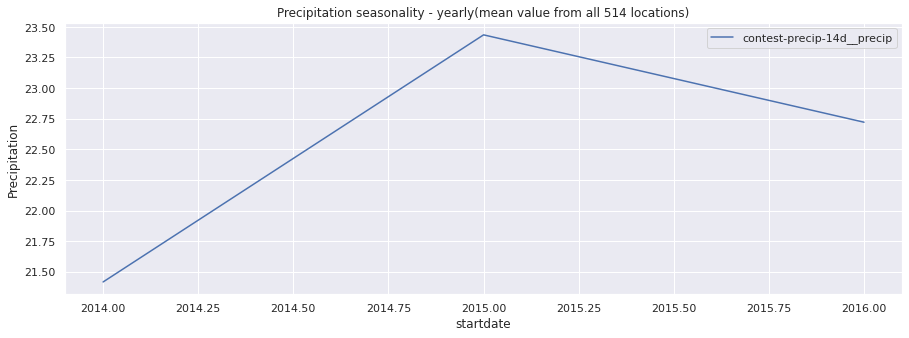

In [37]:
train_data.groupby(time_y)[['contest-precip-14d__precip']].mean().plot(figsize =(15,5))
plt.title("Precipitation seasonality - yearly(mean value from all 514 locations)")
plt.ylabel("Precipitation")

## Look Deeper in Precipitation Forcasting 

In [38]:
precipitation_cols = [col for col in train_data if 'prate' in col ]
precipitation_subset  = train_data[[col for col in train_data if 'prate' in col ]]
print(precipitation_cols)

['nmme-prate-34w__cancm3', 'nmme-prate-34w__cancm4', 'nmme-prate-34w__ccsm3', 'nmme-prate-34w__ccsm4', 'nmme-prate-34w__cfsv2', 'nmme-prate-34w__gfdl', 'nmme-prate-34w__gfdlflora', 'nmme-prate-34w__gfdlflorb', 'nmme-prate-34w__nasa', 'nmme-prate-34w__nmmemean', 'nmme0-prate-56w__cancm30', 'nmme0-prate-56w__cancm40', 'nmme0-prate-56w__ccsm30', 'nmme0-prate-56w__ccsm40', 'nmme0-prate-56w__cfsv20', 'nmme0-prate-56w__gfdlflora0', 'nmme0-prate-56w__gfdlflorb0', 'nmme0-prate-56w__gfdl0', 'nmme0-prate-56w__nasa0', 'nmme0-prate-56w__nmme0mean', 'nmme0-prate-34w__cancm30', 'nmme0-prate-34w__cancm40', 'nmme0-prate-34w__ccsm30', 'nmme0-prate-34w__ccsm40', 'nmme0-prate-34w__cfsv20', 'nmme0-prate-34w__gfdlflora0', 'nmme0-prate-34w__gfdlflorb0', 'nmme0-prate-34w__gfdl0', 'nmme0-prate-34w__nasa0', 'nmme0-prate-34w__nmme0mean', 'nmme-prate-56w__cancm3', 'nmme-prate-56w__cancm4', 'nmme-prate-56w__ccsm3', 'nmme-prate-56w__ccsm4', 'nmme-prate-56w__cfsv2', 'nmme-prate-56w__gfdl', 'nmme-prate-56w__gfdlflor

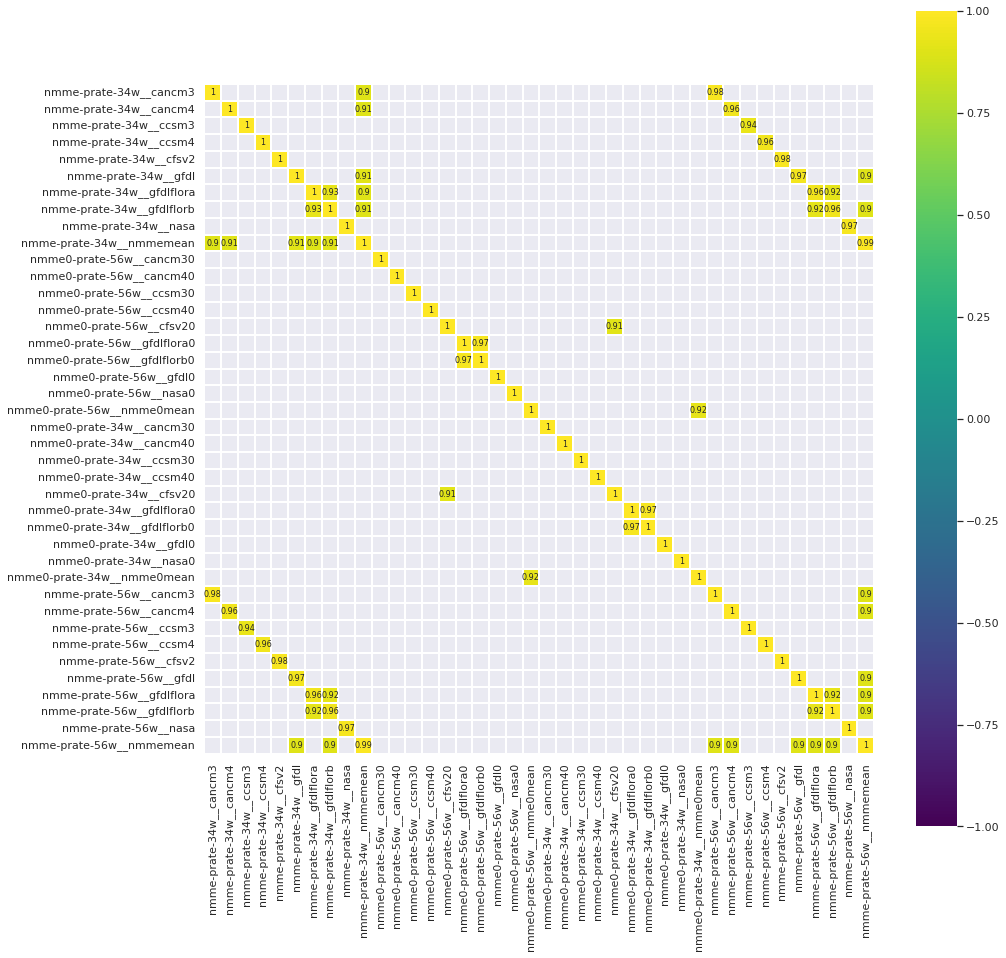

In [39]:
# Compute corr matrix for weighted average of monthly/most recent monthly NMME model forecasts for precipitation
corr = precipitation_subset.corr() 
plt.figure(figsize=(15, 15))

sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

There is a very high correlation between 'gfdlflora', and 'gfdlflorb' values, and also we can see a few other variables. We can drop them from the data frame.  


Text(0, 0.5, 'precipitation')

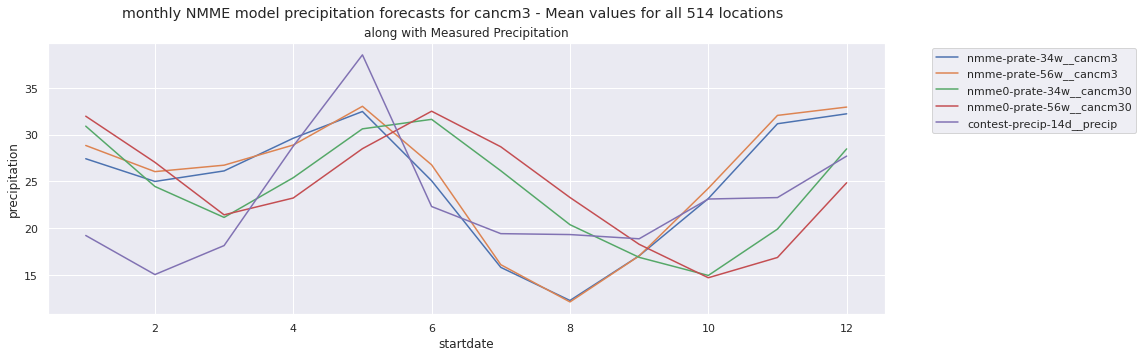

In [40]:
cancm3_col = ['nmme-prate-34w__cancm3','nmme-prate-56w__cancm3','nmme0-prate-34w__cancm30','nmme0-prate-56w__cancm30','contest-precip-14d__precip']
train_data.groupby(time_m)[cancm3_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation forecasts for cancm3 - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

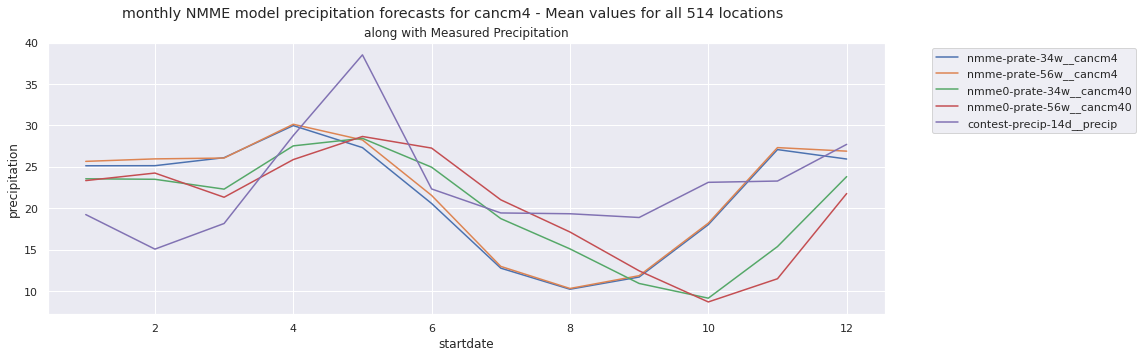

In [41]:
cancm4_col = ['nmme-prate-34w__cancm4','nmme-prate-56w__cancm4','nmme0-prate-34w__cancm40','nmme0-prate-56w__cancm40','contest-precip-14d__precip']
train_data.groupby(time_m)[cancm4_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation forecasts for cancm4 - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

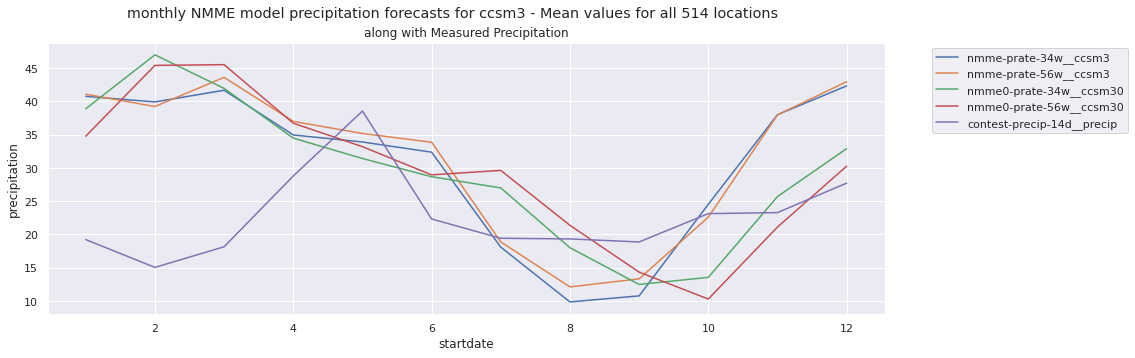

In [42]:
ccsm3_col = ['nmme-prate-34w__ccsm3','nmme-prate-56w__ccsm3','nmme0-prate-34w__ccsm30','nmme0-prate-56w__ccsm30','contest-precip-14d__precip']
train_data.groupby(time_m)[ccsm3_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation forecasts for ccsm3 - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

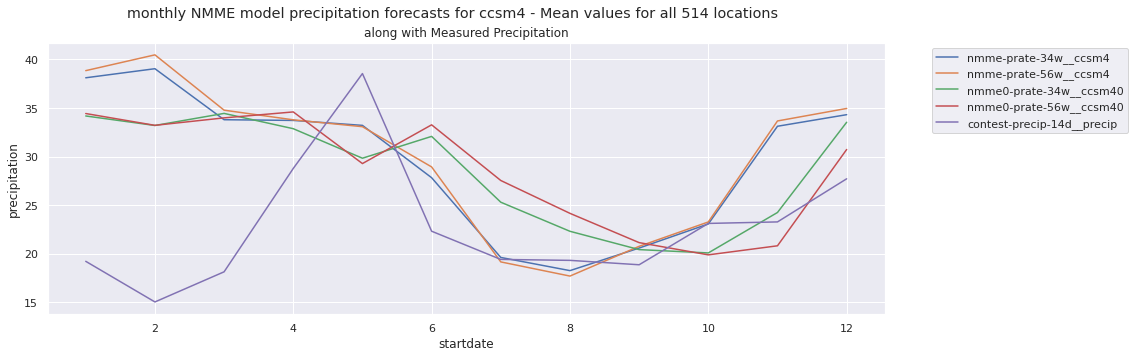

In [43]:
ccsm4_col = ['nmme-prate-34w__ccsm4','nmme-prate-56w__ccsm4','nmme0-prate-34w__ccsm40','nmme0-prate-56w__ccsm40','contest-precip-14d__precip']
train_data.groupby(time_m)[ccsm4_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation forecasts for ccsm4 - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

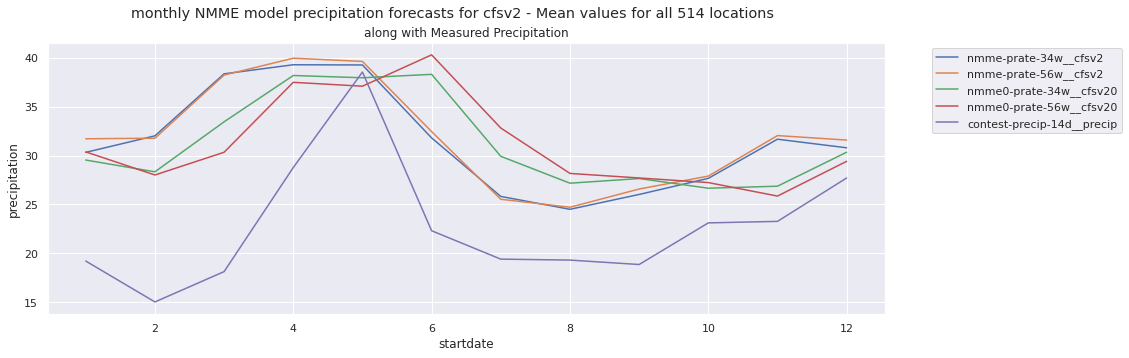

In [44]:
cfsv2_col = ['nmme-prate-34w__cfsv2','nmme-prate-56w__cfsv2','nmme0-prate-34w__cfsv20','nmme0-prate-56w__cfsv20','contest-precip-14d__precip']
train_data.groupby(time_m)[cfsv2_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation forecasts for cfsv2 - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

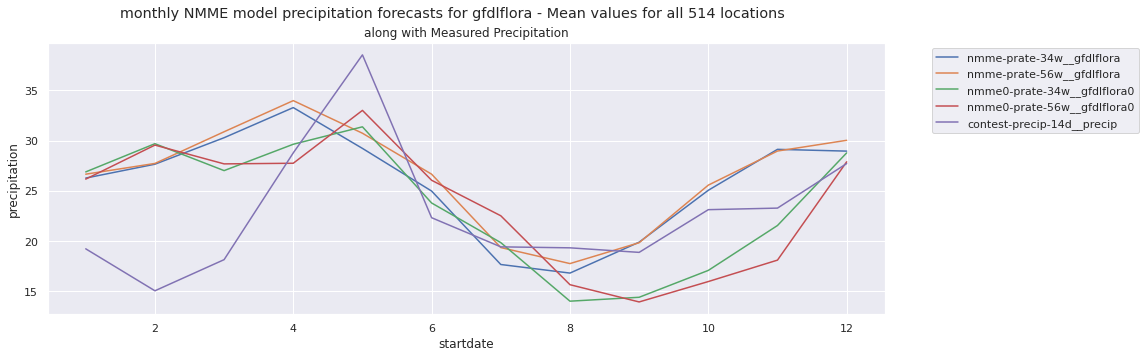

In [45]:
gfdlflora_col = ['nmme-prate-34w__gfdlflora','nmme-prate-56w__gfdlflora','nmme0-prate-34w__gfdlflora0',
                 'nmme0-prate-56w__gfdlflora0','contest-precip-14d__precip']
train_data.groupby(time_m)[gfdlflora_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation forecasts for gfdlflora - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

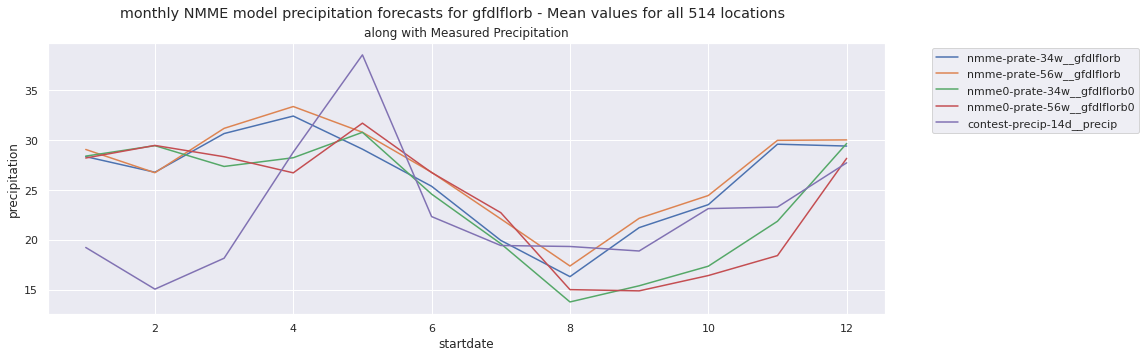

In [46]:
gfdlflorb_col = ['nmme-prate-34w__gfdlflorb','nmme-prate-56w__gfdlflorb','nmme0-prate-34w__gfdlflorb0',
                 'nmme0-prate-56w__gfdlflorb0','contest-precip-14d__precip']
train_data.groupby(time_m)[gfdlflorb_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation forecasts for gfdlflorb - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

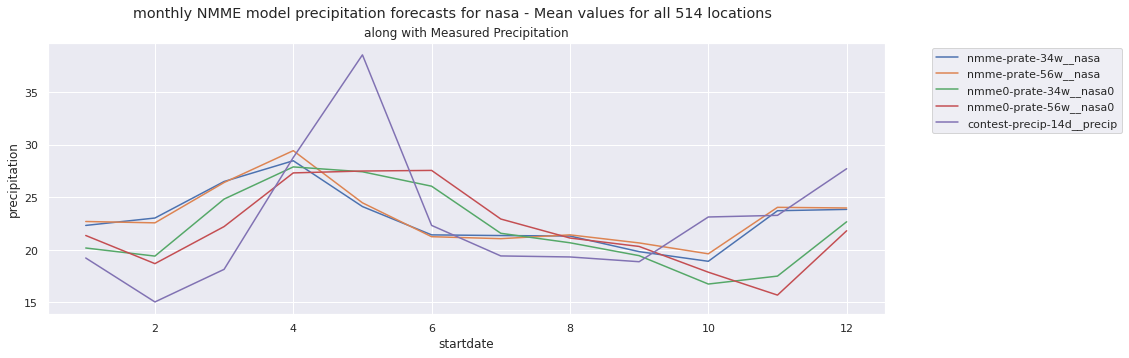

In [47]:
nasa_col = ['nmme-prate-34w__nasa','nmme-prate-56w__nasa','nmme0-prate-34w__nasa0',
            'nmme0-prate-56w__nasa0','contest-precip-14d__precip']
train_data.groupby(time_m)[nasa_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation forecasts for nasa - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

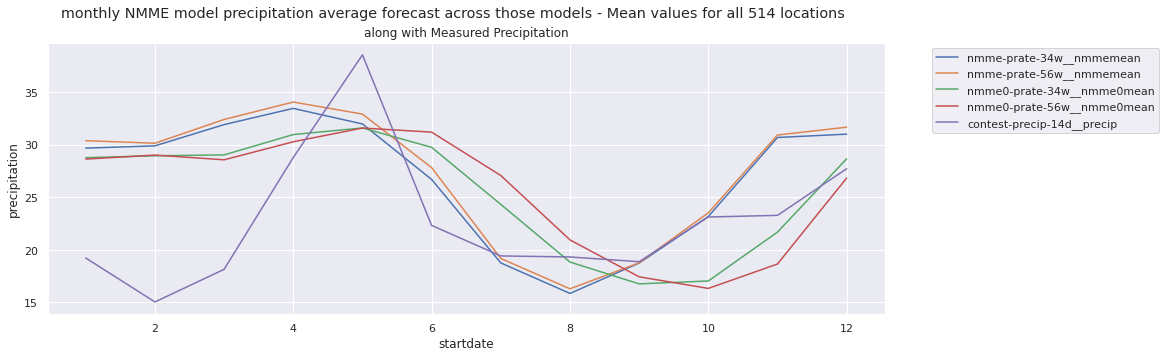

In [48]:
nmmemean_col = ['nmme-prate-34w__nmmemean','nmme-prate-56w__nmmemean','nmme0-prate-34w__nmme0mean',
            'nmme0-prate-56w__nmme0mean','contest-precip-14d__precip']
train_data.groupby(time_m)[nmmemean_col].mean().plot(figsize =(15,5))
plt.suptitle("monthly NMME model precipitation average forecast across those models - Mean values for all 514 locations")
plt.title("along with Measured Precipitation")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("precipitation")

## Madden–Julian oscillation(MJO)

The Madden–Julian oscillation (MJO) is the largest element of the intraseasonal (30- to 90-day) variability in the tropical atmosphere. It is a large-scale coupling between atmospheric circulation and tropical deep atmospheric convection. Unlike a standing pattern like the El Niño–Southern Oscillation (ENSO), the Madden–Julian oscillation is a traveling pattern that propagates eastward, at approximately 4 to 8 m/s (14 to 29 km/h; 9 to 18 mph), through the atmosphere above the warm parts of the Indian and Pacific oceans. This overall circulation pattern manifests itself most clearly as anomalous rainfall. (Source - Wikipedia). 

There are a number of ways in which the MJO influences world weather: (source - metoffice.gov.uk)

* The MJO creates favourable conditions for tropical cyclone activity, which makes the MJO important to monitor during the Atlantic hurricane season.
* The enhanced rainfall phase of the MJO can also bring the onset of the Monsoon seasons around the globe. Conversely, the suppressed convection phase can delay the onset of the Monsoon season.
* There is evidence that the MJO influences the El Nino Southern Oscillation (ENSO) cycle. It does not cause El Nino or La Nina, but it can contribute to the speed of development and intensity of El Nino and La Nina episodes. The MJO appears to be more active during neutral and weak ENSO years.
* There is also evidence to suggest that the MJO can influence the onset of a Sudden Stratospheric Warming (SSW) event.

In [49]:
# Look for any correlation between these interesting variables with Measured Precipitation
interesting_subset  = train_data[['mjo1d__phase', 'mjo1d__amplitude', 'mei__mei','mei__meirank','mei__nip', 'contest-pevpr-sfc-gauss-14d__pevpr',
                      'contest-wind-h10-14d__wind-hgt-10', 'contest-rhum-sig995-14d__rhum', 'contest-wind-h100-14d__wind-hgt-100',
                      'contest-slp-14d__slp', 'contest-wind-vwnd-925-14d__wind-vwnd-925', 'contest-pres-sfc-gauss-14d__pres',
                      'contest-wind-uwnd-250-14d__wind-uwnd-250','contest-prwtr-eatm-14d__prwtr', 'contest-wind-vwnd-250-14d__wind-vwnd-250', 
                      'contest-tmp2m-14d__tmp2m', 'contest-wind-h850-14d__wind-hgt-850', 'contest-wind-uwnd-925-14d__wind-uwnd-925', 
                      'contest-wind-h500-14d__wind-hgt-500']]
corr = interesting_subset.corrwith(train_data['contest-precip-14d__precip']).abs().sort_values(ascending=False)
print(corr)

contest-wind-vwnd-925-14d__wind-vwnd-925    0.378035
contest-rhum-sig995-14d__rhum               0.370457
contest-prwtr-eatm-14d__prwtr               0.340554
contest-pres-sfc-gauss-14d__pres            0.242974
contest-wind-vwnd-250-14d__wind-vwnd-250    0.178920
contest-wind-uwnd-925-14d__wind-uwnd-925    0.157807
contest-pevpr-sfc-gauss-14d__pevpr          0.157017
contest-slp-14d__slp                        0.114380
contest-tmp2m-14d__tmp2m                    0.079041
mei__nip                                    0.075470
mei__meirank                                0.057908
contest-wind-h850-14d__wind-hgt-850         0.048801
contest-wind-uwnd-250-14d__wind-uwnd-250    0.048280
mjo1d__amplitude                            0.043661
mei__mei                                    0.036035
contest-wind-h10-14d__wind-hgt-10           0.021536
contest-wind-h500-14d__wind-hgt-500         0.009961
mjo1d__phase                                0.006425
contest-wind-h100-14d__wind-hgt-100         0.

In [50]:
# Look for any correlation between these interesting variables and the target variable (Observed Temperature)
interesting_subset  = train_data[['mjo1d__phase', 'mjo1d__amplitude', 'mei__mei','mei__meirank','mei__nip', 'contest-pevpr-sfc-gauss-14d__pevpr',
                      'contest-wind-h10-14d__wind-hgt-10', 'contest-rhum-sig995-14d__rhum', 'contest-wind-h100-14d__wind-hgt-100',
                      'contest-slp-14d__slp', 'contest-wind-vwnd-925-14d__wind-vwnd-925', 'contest-pres-sfc-gauss-14d__pres',
                      'contest-wind-uwnd-250-14d__wind-uwnd-250','contest-prwtr-eatm-14d__prwtr', 'contest-wind-vwnd-250-14d__wind-vwnd-250', 
                      'contest-precip-14d__precip', 'contest-wind-h850-14d__wind-hgt-850', 'contest-wind-uwnd-925-14d__wind-uwnd-925', 
                      'contest-wind-h500-14d__wind-hgt-500']]
corr = interesting_subset.corrwith(train_data["contest-tmp2m-14d__tmp2m"]).abs().sort_values(ascending=False)
print(corr)
high_corr = corr.index[corr>0.75]
print(high_corr)

contest-wind-h100-14d__wind-hgt-100         0.898187
contest-wind-h500-14d__wind-hgt-500         0.884177
contest-pevpr-sfc-gauss-14d__pevpr          0.805301
contest-prwtr-eatm-14d__prwtr               0.772465
contest-wind-h10-14d__wind-hgt-10           0.763524
contest-slp-14d__slp                        0.707640
contest-rhum-sig995-14d__rhum               0.565127
contest-wind-h850-14d__wind-hgt-850         0.497195
contest-wind-vwnd-250-14d__wind-vwnd-250    0.432445
contest-wind-uwnd-925-14d__wind-uwnd-925    0.365888
contest-wind-uwnd-250-14d__wind-uwnd-250    0.326666
contest-wind-vwnd-925-14d__wind-vwnd-925    0.273326
contest-pres-sfc-gauss-14d__pres            0.244318
mei__nip                                    0.197470
mjo1d__phase                                0.130790
mjo1d__amplitude                            0.115210
mei__meirank                                0.081722
contest-precip-14d__precip                  0.079041
mei__mei                                    0.

It shows Madden–Julian oscillation (MJO) amplitude, phase considerably correlated with temperature more than the rainfall in given locations.

(**wind at geopotential height at 100 millibars**)'contest-wind-h100-14d__wind-hgt-100', (**wind at geopotential height at 500 millibars**)'contest-wind-h500-14d__wind-hgt-500', (**pressure**)'contest-pevpr-sfc-gauss-14d__pevpr', (**potential evaporation**)'contest-prwtr-eatm-14d__prwtr' **have very high correlations with the target variable**.

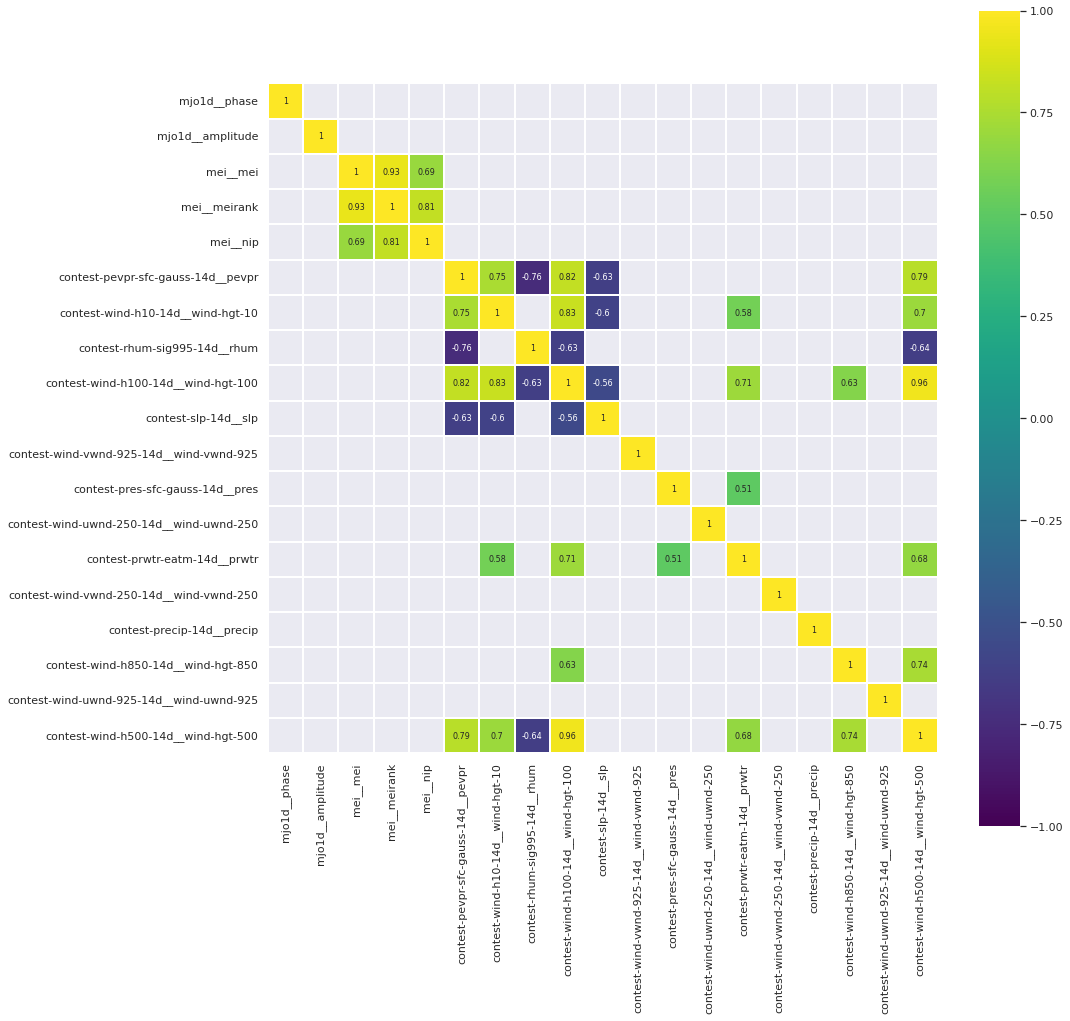

In [51]:
corr = interesting_subset .corr() 
plt.figure(figsize=(15, 15))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

how ever (**wind at geopotential height at 100 millibars**)'contest-wind-h100-14d__wind-hgt-100', (**wind at geopotential height at 500 millibars**)'contest-wind-h500-14d__wind-hgt-500' has a very high correlation between each other. So, it could not be very useful to keep both variables for training our model. 

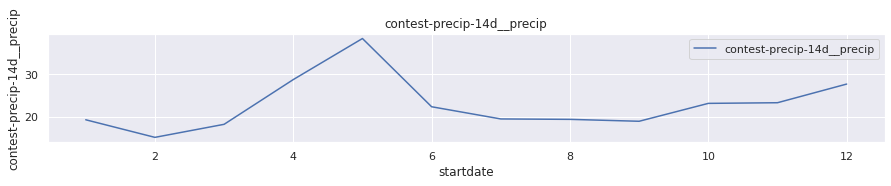

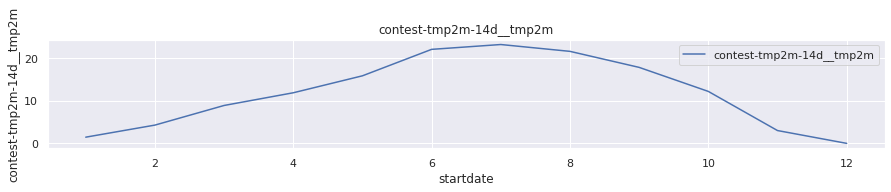

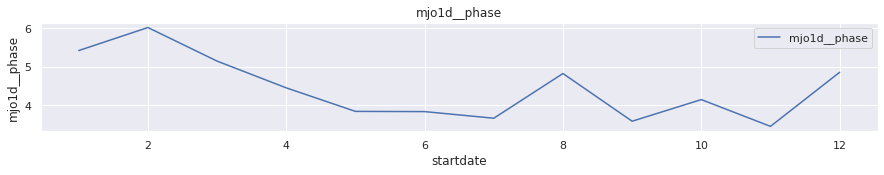

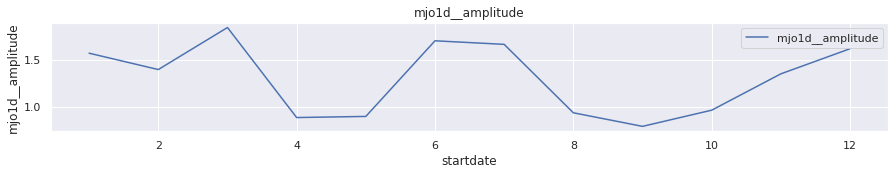

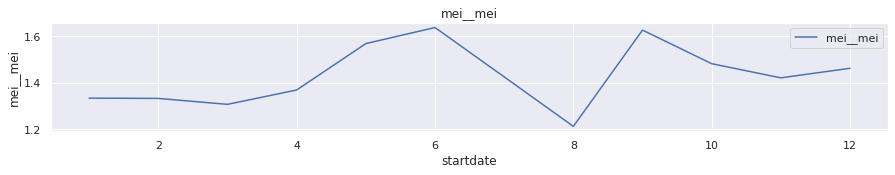

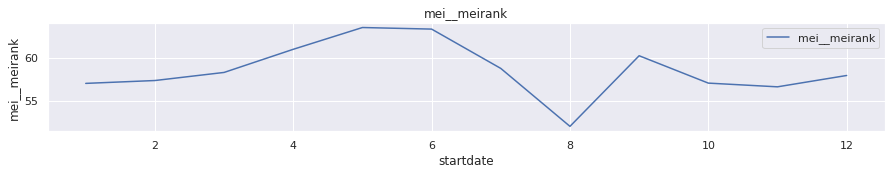

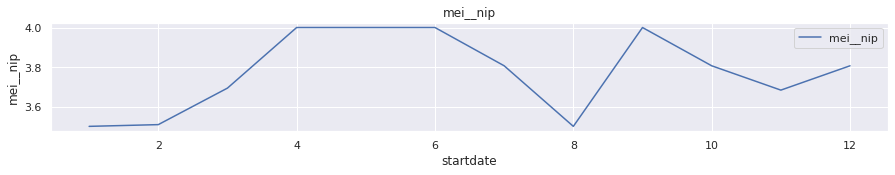

In [52]:
# Madden-Julian Oscillation (MJO) amplitude, phase and MEI rank, Niño Index Phase 
for var in [ 'contest-precip-14d__precip','contest-tmp2m-14d__tmp2m','mjo1d__phase', 'mjo1d__amplitude', 'mei__mei','mei__meirank','mei__nip']: 
    #plot the time series
    train_data.groupby(time_m)[[var]].mean().plot(figsize =(15,2))
    
    # add title
    plt.title(var)
    
    #the y axis lable
    plt.ylabel(var)
    
    plt.show()

## Climate Regions 

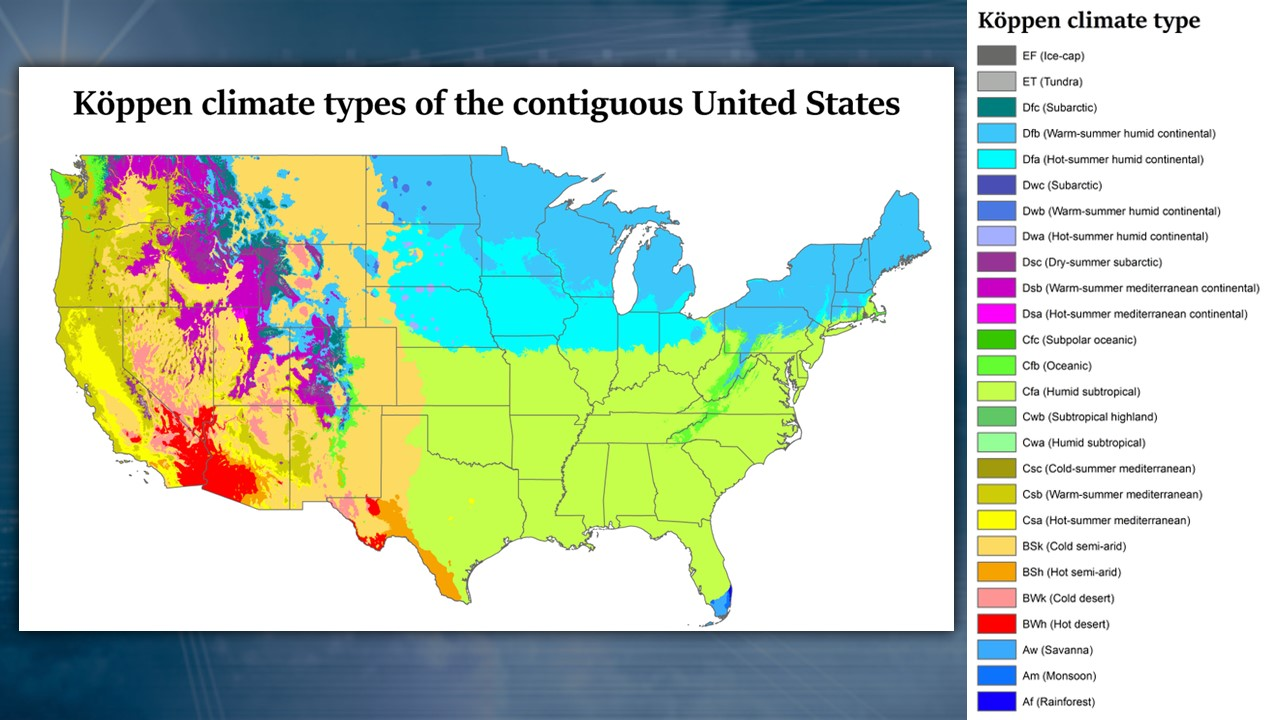

Source(Internet)

In [53]:
climate_regions = np.array(pd.Categorical(train_data['climateregions__climateregion']).categories)
climate_regions

array(['BSh', 'BSk', 'BWh', 'BWk', 'Cfa', 'Cfb', 'Csa', 'Csb', 'Dfa',
       'Dfb', 'Dfc', 'Dsb', 'Dsc', 'Dwa', 'Dwb'], dtype=object)

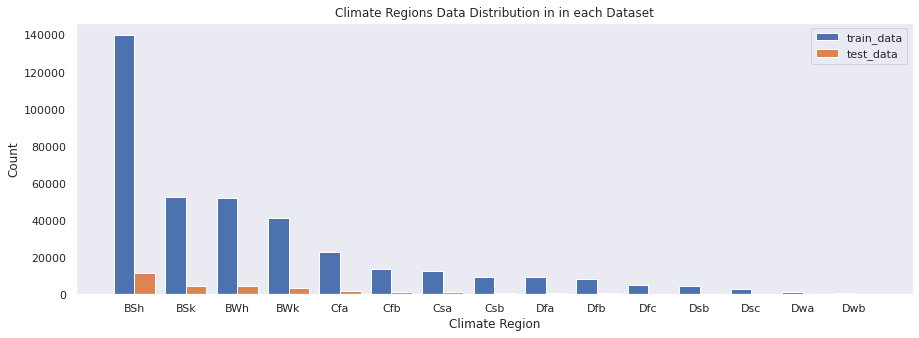

In [54]:
plt.figure(figsize=(15, 5))

y1 = train_data['climateregions__climateregion'].value_counts()
y2 = test_data['climateregions__climateregion'].value_counts()

X_axis = np.arange(len(climate_regions))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = 'train_data')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'test_data')
  
plt.xticks(X_axis, climate_regions)
plt.xlabel("Climate Region")
plt.ylabel("Count")
plt.title("Climate Regions Data Distribution in in each Dataset")
plt.grid()
plt.legend()
plt.show()

###  Check the temperature deviations in each climate zone based on the year

In [55]:
ClimateR_temp = train_data.groupby([train_data.index.year,
                                    'climateregions__climateregion']).agg({'contest-tmp2m-14d__tmp2m':[np.min, np.max, np.mean,np.std]})
ClimateR_temp.columns = ['Minimum','Maximum','Mean','STD']
ClimateR_temp.reset_index(inplace=False)
ClimateR_temp

Minimum    Maximum       Mean  \
startdate climateregions__climateregion                                    
2014      BSh                             2.311120  29.972873  17.658658   
          BSk                           -17.264478  28.105378   7.003995   
          BWh                             1.930251  34.264141  18.903168   
          BWk                           -13.347739  30.746771  12.417451   
          Cfa                            -8.721206  29.421461  14.046425   
          Cfb                            -7.525020  19.329969   8.377196   
          Csa                            -5.448947  28.372086  13.206600   
          Csb                            -7.915028  26.469692   9.261549   
          Dfa                           -15.636697  21.073007   4.982744   
          Dfb                           -20.096473  20.487564   2.187769   
          Dfc                           -16.240566  15.189942   0.909559   
          Dsb                            -9.261389  19.610411   5.102455   
          Dsc                           -10.698535  20.489122   4.326506   
          Dwa                           -12.283349  19.219973   4.356241   
          Dwb                           -13.624374  17.604987   2.179210   
2015      BSh                             2.809400  34.050296  20.807832   
          BSk                           -16.336203  31.772753  11.138737   
          BWh                             2.964660  36.679498  22.121141   
          BWk                           -10.874565  34.405682  15.816208   
          Cfa                            -6.280203  33.486097  17.910426   
          Cfb                            -8.044224  25.929966  10.852179   
          Csa                            -8.318683  32.974608  15.683824   
          Csb                            -9.853099  28.373883  11.521838   
          Dfa                           -14.851219  27.091239  10.591792   
          Dfb                           -19.675203  26.026341   6.973158   
          Dfc                           -19.616489  21.988984   4.509417   
          Dsb                           -11.116000  27.228452   9.190057   
          Dsc                           -12.566056  22.343025   7.385997   
          Dwa                           -10.287039  23.895594   9.805192   
          Dwb                           -12.490940  23.021829   8.014506   
2016      BSh                             6.501891  33.897877  22.608333   
          BSk                           -13.730589  33.000839  13.099305   
          BWh                             3.536710  37.238782  23.954529   
          BWk                            -7.854533  35.170084  17.664524   
          Cfa                            -3.793756  33.971992  19.829664   
          Cfb                           -10.558626  24.821799  12.029773   
          Csa                            -4.602633  32.869982  16.930209   
          Csb                            -7.490150  29.503352  12.655737   
          Dfa                           -13.644521  28.330939  13.105356   
          Dfb                           -20.358963  26.763910   9.127501   
          Dfc                           -15.688381  19.775969   6.001517   
          Dsb                            -8.130209  23.970409  10.779722   
          Dsc                            -7.986075  23.868982   8.790949   
          Dwa                            -7.553453  25.034974  12.338213   
          Dwb                           -10.289750  23.795640  10.926907   

                                               STD  
startdate climateregions__climateregion             
2014      BSh                             6.701110  
          BSk                             8.704794  
          BWh                             7.527241  
          BWk                             7.776219  
          Cfa                             8.251768  
          Cfb                             6.210394  
          Csa                             7.26

**Here I checked the yearly values. In the same way we can check the monthly values. This data will be useful for our predictions. We can roughly conclude the accuracy of our test predictions based on this** 

<a id="8"></a> <br>
# 8. Train | Validation Split

In [56]:
train_set = train_data[train_data.index <= '2016-03-31']
val_set = train_data[train_data.index > '2016-03-31'] # 2016-03-31
train_set.shape, val_set.shape

((297092, 243), (78642, 243))

In [57]:
X_train = train_set.drop("contest-tmp2m-14d__tmp2m", axis=1).copy(deep=True)
y_train = train_set["contest-tmp2m-14d__tmp2m"].copy(deep=True)
X_train.shape, y_train.shape

((297092, 242), (297092,))

In [58]:
X_valid = val_set.drop("contest-tmp2m-14d__tmp2m", axis=1).copy(deep=True)
y_valid = val_set["contest-tmp2m-14d__tmp2m"].copy(deep=True)
X_valid.shape, y_valid.shape

((78642, 242), (78642,))

In [59]:
X_train.head()

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location
startdate,,,,,,,,,,,,,,,,,,,,,
2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,0.833300000_0.000000000
2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,0.833300000_0.000000000
2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,0.833300000_0.000000000
2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,0.833300000_0.000000000
2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,...,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,0.833300000_0.000000000


In [60]:
X_valid.head()

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location
startdate,,,,,,,,,,,,,,,,,,,,,
2016-04-01,370.84,20.24,21.33,18.0,20.74,18.65,18.08,16.81,19.54,21.51,...,34.61,-31.27,91.76,15.08,-33.41,-14.44,16.51,43.49,33.78,0.833300000_0.000000000
2016-04-02,357.57,20.24,21.33,18.0,20.74,18.65,18.08,16.81,19.54,21.51,...,33.58,-21.99,90.68,21.46,-33.55,-13.96,19.21,43.06,37.33,0.833300000_0.000000000
2016-04-03,340.01,20.24,21.33,18.0,20.74,18.65,18.08,16.81,19.54,21.51,...,34.98,-13.39,85.91,25.43,-31.80,-13.58,21.22,42.06,36.72,0.833300000_0.000000000
2016-04-04,331.27,20.24,21.33,18.0,20.74,18.65,18.08,16.81,19.54,21.51,...,34.84,-7.73,80.12,23.01,-27.71,-16.58,20.06,41.61,34.26,0.833300000_0.000000000
2016-04-05,309.60,20.24,21.33,18.0,20.74,18.65,18.08,16.81,19.54,21.51,...,31.01,-6.72,75.10,19.24,-24.54,-24.63,20.05,39.75,25.07,0.833300000_0.000000000


In [61]:
X_train.index.min(), X_train.index.max()

(Timestamp('2014-09-01 00:00:00'), Timestamp('2016-03-31 00:00:00'))

In [62]:
X_valid.index.min(), X_valid.index.max()

(Timestamp('2016-04-01 00:00:00'), Timestamp('2016-08-31 00:00:00'))

## Data Preparation

### Exploring and Handling Categorical Attributes

In [63]:
cat_cols = [cname for cname in train_set.columns if train_set[cname].dtype not in ['int64', 'float64']]
print(cat_cols)

['climateregions__climateregion', 'location']


In [64]:
X_train['climateregions__climateregion'].value_counts()

BSk    110398
Dfb     41616
Cfa     41038
Csb     32368
Dfa     17918
BWk     10982
Dfc      9826
BWh      7514
Csa      7514
Dsb      6358
BSh      4046
Cfb      3468
Dsc      2312
Dwa      1156
Dwb       578
Name: climateregions__climateregion, dtype: int64

In [65]:
test_data['climateregions__climateregion'].value_counts()

BSk    11651
Dfb     4392
Cfa     4331
Csb     3416
Dfa     1891
BWk     1159
Dfc     1037
BWh      793
Csa      793
Dsb      671
BSh      427
Cfb      366
Dsc      244
Dwa      122
Dwb       61
Name: climateregions__climateregion, dtype: int64

In [66]:
X_train['climateregions__climateregion'].isin(test_data['climateregions__climateregion']).value_counts()

True    297092
Name: climateregions__climateregion, dtype: int64

**train_data and test_data have the same climate regions**

In [67]:
X_train['location'].value_counts()

0.833300000_0.000000000    578
0.200000000_0.818100000    578
0.000000000_0.772700000    578
0.900000000_0.727200000    578
0.866600000_0.727200000    578
                          ... 
0.533300000_0.454500000    578
0.500000000_0.454500000    578
0.466600000_0.454500000    578
0.433300000_0.454500000    578
0.866600000_1.000000000    578
Name: location, Length: 514, dtype: int64

In [68]:
test_data['location'].value_counts()

0.833300000_0.000000000    61
0.200000000_0.818100000    61
0.000000000_0.772700000    61
0.900000000_0.727200000    61
0.866600000_0.727200000    61
                           ..
0.533300000_0.454500000    61
0.500000000_0.454500000    61
0.466600000_0.454500000    61
0.433300000_0.454500000    61
0.866600000_1.000000000    61
Name: location, Length: 514, dtype: int64

In [69]:
X_train['location'].isin(test_data['location']).value_counts()

True    297092
Name: location, dtype: int64

**train_data and test_data have the same locations**

In [70]:
# encoding Categorical data
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder() # Use ordinal encoder
X_train[cat_cols] = enc.fit_transform(X_train[cat_cols] )
test_data[cat_cols] = enc.transform(test_data[cat_cols] )

### Feature Selection using the Filter Method

In [71]:
# Using Pearson Correlation
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [72]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.95)]
print(to_drop)

['nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30', 'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20', 'nmme0-tmp2m-34w__gfdlflora0', 'nmme0-tmp2m-34w__gfdlflorb0', 'nmme0-tmp2m-34w__gfdl0', 'nmme0-tmp2m-34w__nasa0', 'nmme0-tmp2m-34w__nmme0mean', 'nmme-tmp2m-56w__cancm4', 'nmme-tmp2m-56w__ccsm3', 'nmme-tmp2m-56w__ccsm4', 'nmme-tmp2m-56w__cfsv2', 'nmme-tmp2m-56w__gfdl', 'nmme-tmp2m-56w__gfdlflora', 'nmme-tmp2m-56w__gfdlflorb', 'nmme-tmp2m-56w__nasa', 'nmme-tmp2m-56w__nmmemean', 'nmme0-prate-56w__gfdlflorb0', 'nmme0-prate-34w__gfdlflorb0', 'nmme-prate-56w__cancm3', 'nmme-prate-56w__cancm4', 'nmme-prate-56w__ccsm4', 'nmme-prate-56w__cfsv2', 'nmme-prate-56w__gfdl', 'nmme-prate-56w__gfdlflora', 'nmme-prate-56w__gfdlflorb', 'nmme-prate-56w__nasa', 'nmme-prate-56w__nmmemean', 'nmme-tmp2m-34w__cancm3', 'nmme-tmp2m-34w__cancm4', 'nmme-tmp2m-34w__ccsm4', 'nmme-tmp2m-34w__cfsv2', 'nmme-tmp2m-34w__gfdl', 'nmme-tmp2m-34w__gfdlflora', 'nmme-tmp2m-34w__gfdlflorb', 'nmme-tmp2m-34w__nasa', 'nmme

In [73]:
# Dropped highly correlated features from the dataset
X_train = X_train.drop(to_drop, axis=1)
X_train.head()

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location
startdate,,,,,,,,,,,,,,,,,,,,,
2014-09-01,237.00,29.02,31246.63,28.3,81.72,25.33,17.55,13.59,25.28,38.05,...,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,423.0
2014-09-02,228.90,29.02,31244.78,28.3,82.56,25.33,17.55,13.59,25.28,38.05,...,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,423.0
2014-09-03,220.69,29.02,31239.27,28.3,83.29,25.33,17.55,13.59,25.28,38.05,...,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,423.0
2014-09-04,225.28,29.02,31232.86,28.3,83.26,25.33,17.55,13.59,25.28,38.05,...,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,423.0
2014-09-05,237.24,29.02,31226.16,28.3,82.50,25.33,17.55,13.59,25.28,38.05,...,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,423.0


### Explore the Numerical Attributes

In [74]:
num_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

not_to_scale = {'climateregions__climateregion'}
 
num_cols = [ele for ele in num_cols if ele not in not_to_scale]
data_num = X_train[num_cols]

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
mmsc = MinMaxScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols] )

In [76]:
X_train

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,location
startdate,,,,,,,,,,,,,,,,,,,,,
2014-09-01,0.005742,1.782156,0.762323,1.858583,1.025627,0.016847,-0.281764,-0.828820,-0.244869,0.326740,...,-0.769977,-0.016635,-0.407744,0.535005,1.658575,1.222235,-0.947855,0.066607,-0.265511,1.122128
2014-09-02,-0.038760,1.782156,0.756708,1.858583,1.075391,0.016847,-0.281764,-0.828820,-0.244869,0.326740,...,-0.752063,-0.005690,0.082187,0.734665,1.672242,1.198393,-1.344056,0.211939,-0.312243,1.122128
2014-09-03,-0.083866,1.782156,0.739983,1.858583,1.118638,0.016847,-0.281764,-0.828820,-0.244869,0.326740,...,-0.684607,-0.048981,0.545955,0.752255,1.670206,0.910892,-1.706308,0.198391,-0.255842,1.122128
2014-09-04,-0.058648,1.782156,0.720526,1.858583,1.116860,0.016847,-0.281764,-0.828820,-0.244869,0.326740,...,-0.597278,-0.068924,0.862449,0.554138,1.730107,0.528024,-1.862937,0.326891,-0.057633,1.122128
2014-09-05,0.007060,1.782156,0.700190,1.858583,1.071836,0.016847,-0.281764,-0.828820,-0.244869,0.326740,...,-0.618551,-0.037307,0.818562,0.436873,1.850492,0.146909,-2.058916,0.477560,-0.008886,1.122128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,-0.983788,-0.979653,-1.085911,-0.631149,1.068281,-0.121754,-0.034904,-0.477576,-0.499897,-0.473671,...,-0.353765,-1.554904,2.287090,0.231350,-0.881415,0.803955,0.345683,1.742439,1.030504,1.425406
2016-03-28,-0.967526,-0.979653,-0.968260,-0.589761,1.103234,-0.070098,0.041333,-0.480748,-0.492774,-0.470654,...,0.205475,-1.533988,2.563494,0.497357,-0.913111,0.485951,0.351855,1.587255,0.856869,1.425406
2016-03-29,-0.959505,-0.979653,-0.833368,-0.548373,1.109751,-0.017931,0.117569,-0.484374,-0.485175,-0.468140,...,0.758557,-1.395361,2.670679,0.678810,-0.825294,0.116055,0.269683,1.350372,0.663494,1.425406


## Train Dataset

### Adding Datetime features

In [77]:
dtf = DatetimeFeatures(
        # the datetime variable
        variables ="index",
        
        # The features we want to create
        features_to_extract=[
            "year",
            "month",
        ]
)
# Extract the datetime features
X_train = dtf.fit_transform(X_train)

### Adding Periodic Features

In [78]:
# Create features that capture the cyclical representation

cyclicf = CyclicalFeatures(
            variables = ["year", "month"],
            drop_original = True,
)

X_train = cyclicf.fit_transform(X_train)
X_train["season"] = X_train.index.month%12 // 3 + 1

X_train[[ v for v in X_train.columns if "year" in v or "month" in v]]. head()

,year_sin,year_cos,month_sin,month_cos
startdate,,,,
2014-09-01,-0.006233,0.999981,-1.0,-1.836970e-16
2014-09-02,-0.006233,0.999981,-1.0,-1.836970e-16
2014-09-03,-0.006233,0.999981,-1.0,-1.836970e-16
2014-09-04,-0.006233,0.999981,-1.0,-1.836970e-16
2014-09-05,-0.006233,0.999981,-1.0,-1.836970e-16


### Adding Dummie Variables

In [79]:
# Adding Dummie Variables for the season
X_train = pd.get_dummies(data=X_train, columns=['season'])

In [80]:
# Adding Dummie Variables for the climateregions
#X_train = pd.get_dummies(data=X_train, columns=['climateregions__climateregion'])

In [81]:
X_train.head()

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,...,wind-vwnd-925-2010-20,location,year_sin,year_cos,month_sin,month_cos,season_1,season_2,season_3,season_4
startdate,,,,,,,,,,,,,,,,,,,,,
2014-09-01,0.005742,1.782156,0.762323,1.858583,1.025627,0.016847,-0.281764,-0.82882,-0.244869,0.32674,...,-0.265511,1.122128,-0.006233,0.999981,-1.0,-1.836970e-16,0,0,0,1
2014-09-02,-0.038760,1.782156,0.756708,1.858583,1.075391,0.016847,-0.281764,-0.82882,-0.244869,0.32674,...,-0.312243,1.122128,-0.006233,0.999981,-1.0,-1.836970e-16,0,0,0,1
2014-09-03,-0.083866,1.782156,0.739983,1.858583,1.118638,0.016847,-0.281764,-0.82882,-0.244869,0.32674,...,-0.255842,1.122128,-0.006233,0.999981,-1.0,-1.836970e-16,0,0,0,1
2014-09-04,-0.058648,1.782156,0.720526,1.858583,1.116860,0.016847,-0.281764,-0.82882,-0.244869,0.32674,...,-0.057633,1.122128,-0.006233,0.999981,-1.0,-1.836970e-16,0,0,0,1
2014-09-05,0.007060,1.782156,0.700190,1.858583,1.071836,0.016847,-0.281764,-0.82882,-0.244869,0.32674,...,-0.008886,1.122128,-0.006233,0.999981,-1.0,-1.836970e-16,0,0,0,1


## Validation Data Preparation

In [82]:
# Get the same shape as train set by dropping the less useful features 
X_valid = X_valid.drop(to_drop, axis=1)

In [83]:
# encoding Categorical data
X_valid[cat_cols] = enc.transform(X_valid[cat_cols] )

In [84]:
val_num_cols = [cname for cname in X_valid.columns if X_valid[cname].dtype in ['int64', 'float64']]

not_to_scale = {'climateregions__climateregion'}
 
val_num_cols = [ele for ele in val_num_cols  if ele not in not_to_scale]
val_data_num = X_valid[val_num_cols]

In [85]:
# Scaling numerical data
X_valid[val_num_cols ] = sc.transform(X_valid[val_num_cols] )

In [86]:
# Extract the datetime features
X_valid = dtf.transform(X_valid)

In [87]:
# Create features that capture the cyclical representation
X_valid = cyclicf.transform(X_valid)
X_valid["season"] = X_valid.index.month%12 // 3 + 1

X_valid[[ v for v in X_valid.columns if "year" in v or "month" in v]]. head()

,year_sin,year_cos,month_sin,month_cos
startdate,,,,
2016-04-01,-2.449294e-16,1.0,0.866025,-0.5
2016-04-02,-2.449294e-16,1.0,0.866025,-0.5
2016-04-03,-2.449294e-16,1.0,0.866025,-0.5
2016-04-04,-2.449294e-16,1.0,0.866025,-0.5
2016-04-05,-2.449294e-16,1.0,0.866025,-0.5


In [88]:
X_valid.index.min(), X_valid.index.max()

(Timestamp('2016-04-01 00:00:00'), Timestamp('2016-08-31 00:00:00'))

Well, I faced a problem here. My validation dataset does not have data for seasons 1, and season 4. My automatic function did not fulfill my requirement as I wanted. So I just created those variables manually. :)

In [89]:
# Adding Dummie Variables for the season
X_valid = pd.get_dummies(data=X_valid, columns=['season'])
X_valid.insert(loc = len(X_valid.columns)-2, column = 'season_1',value = 0)
X_valid['season_4'] = 0

In [90]:
# Adding Dummie Variables for the climateregions
# X_valid = pd.get_dummies(data=X_valid, columns=['climateregions__climateregion'])

In [91]:
X_valid.head()

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,...,wind-vwnd-925-2010-20,location,year_sin,year_cos,month_sin,month_cos,season_1,season_2,season_3,season_4
startdate,,,,,,,,,,,,,,,,,,,,,
2016-04-01,0.741063,0.985812,0.084526,1.406992,0.071231,0.122205,-0.425161,0.980882,0.982784,1.093969,...,0.910853,1.122128,-2.449294e-16,1.0,0.866025,-0.5,0,1,0,0
2016-04-02,0.668157,0.985812,0.069714,1.406992,0.199195,0.122205,-0.425161,0.980882,0.982784,1.093969,...,1.053870,1.122128,-2.449294e-16,1.0,0.866025,-0.5,0,1,0,0
2016-04-03,0.571682,0.985812,0.057937,1.406992,0.288651,0.122205,-0.425161,0.980882,0.982784,1.093969,...,1.029295,1.122128,-2.449294e-16,1.0,0.866025,-0.5,0,1,0,0
2016-04-04,0.523664,0.985812,0.068196,1.406992,0.413653,0.122205,-0.425161,0.980882,0.982784,1.093969,...,0.930191,1.122128,-2.449294e-16,1.0,0.866025,-0.5,0,1,0,0
2016-04-05,0.404609,0.985812,0.084284,1.406992,0.546948,0.122205,-0.425161,0.980882,0.982784,1.093969,...,0.559958,1.122128,-2.449294e-16,1.0,0.866025,-0.5,0,1,0,0


## Test Data Preparation

In [92]:
test_data = test_data.drop(to_drop, axis=1)

In [93]:
test_num_cols = [cname for cname in test_data.columns if test_data[cname].dtype in ['int64', 'float64']]

not_to_scale = {'climateregions__climateregion'}
 
test_num_cols = [ele for ele in test_num_cols  if ele not in not_to_scale]
test_data_num = test_data[test_num_cols]

In [94]:
test_data[test_num_cols ] = sc.transform(test_data[test_num_cols] )

In [95]:
test_data = dtf.transform(test_data)

In [96]:
test_data = cyclicf.transform(test_data)
test_data["season"] = test_data.index.month%12 // 3 + 1

test_data[[ v for v in test_data.columns if "year" in v or "month" in v]]. head()

,year_sin,year_cos,month_sin,month_cos
startdate,,,,
2022-11-01,0.018699,0.999825,-0.5,0.866025
2022-11-02,0.018699,0.999825,-0.5,0.866025
2022-11-03,0.018699,0.999825,-0.5,0.866025
2022-11-04,0.018699,0.999825,-0.5,0.866025
2022-11-05,0.018699,0.999825,-0.5,0.866025


In [97]:
test_data = pd.get_dummies(data=test_data, columns=['season'])
test_data.insert(loc = len(test_data.columns)-1, column = 'season_2',value = 0)
test_data.insert(loc = len(test_data.columns)-1, column = 'season_3',value = 0)

In [98]:
# test_data = pd.get_dummies(data=test_data, columns=['climateregions__climateregion'])

In [99]:
test_data.head()

,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,...,wind-vwnd-925-2010-20,location,year_sin,year_cos,month_sin,month_cos,season_1,season_2,season_3,season_4
startdate,,,,,,,,,,,,,,,,,,,,,
2022-11-01,0.570968,1.950857,0.721012,1.83467,0.452160,-0.255241,-0.035509,-0.701466,-0.039706,0.05625,...,-0.197426,1.122128,0.018699,0.999825,-0.5,0.866025,0,0,0,1
2022-11-02,0.542124,1.950857,0.713758,1.83467,0.445644,-0.255241,-0.035509,-0.701466,-0.039706,0.05625,...,0.120433,1.122128,0.018699,0.999825,-0.5,0.866025,0,0,0,1
2022-11-03,0.559705,1.950857,0.697458,1.83467,0.475265,-0.255241,-0.035509,-0.701466,-0.039706,0.05625,...,0.090621,1.122128,0.018699,0.999825,-0.5,0.866025,0,0,0,1
2022-11-04,0.603548,1.950857,0.684132,1.83467,0.442681,-0.255241,-0.035509,-0.701466,-0.039706,0.05625,...,-0.019360,1.122128,0.018699,0.999825,-0.5,0.866025,0,0,0,1
2022-11-05,0.667168,1.950857,0.664919,1.83467,0.401212,-0.255241,-0.035509,-0.701466,-0.039706,0.05625,...,0.341203,1.122128,0.018699,0.999825,-0.5,0.866025,0,0,0,1


<a id="9"></a> <br>
# 9. Time Series Split for Cross Validation

**Since the dataset is a time-series event log (temperature), I used time-sensitive cross-validation splitter to evaluate the temperature forecasting model as realistically as possible. I used a gap of 3 months between the train and test side of the splits. I also limit the training set size to make the performance of the CV folds more stable**

In [100]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate

tscv =TimeSeriesSplit(gap=120, max_train_size=10000, n_splits=5, test_size=1000)
#for i, (train_index, test_index) in enumerate(tscv.split(X_train, y_train)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")

<a id="10"></a> <br>
# 10. Training, Evaluating and Validation

In [101]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Fixed a Baseline

In [102]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the validation set
baseline_predictions = np.ones(y_valid.shape) * mean_train
# Compute RMSE and MAE
mae_baseline = mean_absolute_error(y_valid, baseline_predictions)
rmse_baseline = np.sqrt(mean_squared_error(y_valid, baseline_predictions))
print("Baseline MAE is {:.2f}".format(mae_baseline))
print("Baseline RMSE is {:.2f}".format(rmse_baseline))

Baseline MAE is 9.51
Baseline RMSE is 11.16


**This scores are what we can achieve with no efforts. Let's see how good my model is.......**

## Gradient Boosting with Ensemble Learning

### Histogram-Based Gradient Boosting

In [103]:
# This was not the improved model.
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor(loss='squared_error', 
                                     learning_rate=0.01, 
                                     max_iter=6000, 
                                     max_leaf_nodes=31, 
                                     max_depth=None, 
                                     min_samples_leaf=20, 
                                     l2_regularization=1.0, 
                                     max_bins=255, 
                                     warm_start=False, 
                                     early_stopping='auto', 
                                     scoring='loss',
                                     validation_fraction=0.1, 
                                     n_iter_no_change=10, 
                                     tol=1e-07, 
                                     verbose=0, 
                                     random_state=None)

In [104]:
hgbr.fit(X=X_train, y=y_train)

HistGradientBoostingRegressor(l2_regularization=1.0, learning_rate=0.01,
                              max_iter=6000)

In [105]:
train_predictions = hgbr.predict(X_train)

In [106]:
# Evaluation on Validation dataset
train_rmse = np.sqrt(mean_squared_error(y_true=y_train, y_pred=train_predictions))
train_r2 = r2_score(y_train, y_pred=train_predictions)
print('rmse value for hgbr model is', train_rmse)
print('r2 value for hgbr model is', train_r2)

rmse value for hgbr model is 0.47867023631973676
r2 value for hgbr model is 0.9975814943475371


In [107]:
hgbr_predictions = hgbr.predict(X_valid)

In [108]:
# Evaluation on Validation dataset
valid_rmse = np.sqrt(mean_squared_error(y_true=y_valid, y_pred=hgbr_predictions))
valid_r2 = r2_score(y_valid, y_pred=hgbr_predictions)
print('rmse value for hgbr model is', valid_rmse)
print('r2 value for hgbr model is', valid_r2)

rmse value for hgbr model is 1.3734291925409472
r2 value for hgbr model is 0.9555424072579817


In [109]:
# Cross Validation HistGradientBoostingRegressor
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(hgbr, X_train, y_train, cv=tscv)

Mean Absolute Error:     0.666 +/- 0.101
Root Mean Squared Error: 0.905 +/- 0.129


### XGBoost

In [110]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(learning_rate = 0.2,
                        n_estimators= 8000, 
                        max_depth= 5,
                        subsample= 0.8,
                        colsample_bytree= 1,
                        gamma= 1,
                       )

In [111]:
xgbr.fit(X=X_train, y=y_train, early_stopping_rounds=100, eval_set=[(X_valid, y_valid)], verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=8000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [112]:
# Evaluation on Training dataset
train_predictions = xgbr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_true=y_train, y_pred=train_predictions))
train_r2 = r2_score(y_train, y_pred=train_predictions)
print('rmse value for xgbr model is', train_rmse)
print('r2 value for xgbr model is', train_r2)

rmse value for xgbr model is 0.36299522644939963
r2 value for xgbr model is 0.9986091634766997


In [113]:
# Evaluation on Validation dataset
xgbr_predictions = xgbr.predict(X_valid)
valid_rmse = np.sqrt(mean_squared_error(y_true=y_valid, y_pred=xgbr_predictions))
valid_r2 = r2_score(y_valid, y_pred=xgbr_predictions)
print('rmse value for xgbr model is', valid_rmse)
print('r2 value for xgbr model is', valid_r2)

rmse value for xgbr model is 1.4557057257707626
r2 value for xgbr model is 0.9500563158695188


In [114]:
# Cross Validation XGBoostRegressor
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


#evaluate(xgbr, X_train, y_train, cv=tscv)

### LightGBM

In [115]:
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor(
        objective='regression',
        metric='l1',
        is_unbalance=True,
        bagging_freq=5,
        n_estimators=600,
        boosting='dart',
        num_leaves=28,
        max_depth=12,
        learning_rate=0.1,
        feature_fraction = 0.9,
        num_iterations =10000,
        subsample=0.2)

In [116]:
lgbmr.fit(X=X_train, y=y_train, early_stopping_rounds=200, eval_set=[(X_valid, y_valid)], verbose=0)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


LGBMRegressor(bagging_freq=5, boosting='dart', feature_fraction=0.9,
              is_unbalance=True, max_depth=12, metric='l1', n_estimators=600,
              num_iterations=10000, num_leaves=28, objective='regression',
              subsample=0.2)

In [117]:
# Evaluation on Training dataset
train_predictions = lgbmr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_true=y_train, y_pred=train_predictions))
train_r2 = r2_score(y_train, y_pred=train_predictions)
print('rmse value for lgbmr model is', train_rmse)
print('r2 value for lgbmr model is', train_r2)

rmse value for lgbmr model is 0.1995451464269427
r2 value for lgbmr model is 0.9995797027034313


In [118]:
# Evaluation on Validation dataset
lgbmr_predictions = lgbmr.predict(X_valid)
valid_rmse = np.sqrt(mean_squared_error(y_true=y_valid, y_pred=lgbmr_predictions))
valid_r2 = r2_score(y_valid, y_pred=lgbmr_predictions)
print('rmse value for lgbmr model is', valid_rmse)
print('r2 value for lgbmr model is', valid_r2)

rmse value for lgbmr model is 1.2304802812008688
r2 value for lgbmr model is 0.964315245641415


In [119]:
# Cross Validation LightGBMRegressor
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


#evaluate(lgbmr, X_train, y_train, cv=tscv)

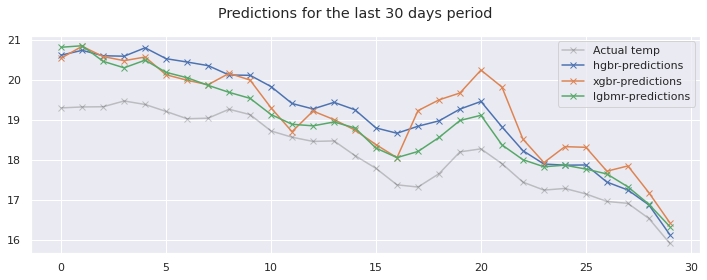

In [120]:
last_month = slice(-30, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions for the last 30 days period")
ax.plot(
    y_valid.values[last_month],
    "x-",
    alpha=0.2,
    label="Actual temp",
    color="black",
)
ax.plot(hgbr_predictions[last_month], "x-", label="hgbr-predictions")
ax.plot(xgbr_predictions[last_month], "x-", label="xgbr-predictions")
ax.plot(lgbmr_predictions[last_month], "x-", label="lgbmr-predictions")
_ = ax.legend()

In [121]:
test_predictions = lgbmr.predict(test_data)

In [122]:
submit['contest-tmp2m-14d__tmp2m'] = test_predictions
submit.to_csv('submission_lgmbr.csv' ,index = False)